In [1]:
import evaluate
from RFDN import RFDN

In [2]:
model = RFDN(nf=10, upscale=2)
checkpoint_file = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/checkpoint_1.tar"
data_dir = "/home/samuel/Documents/CMPUT511/Project/Data"

e = evaluate.Evaluate(model, checkpoint_file, data_dir)

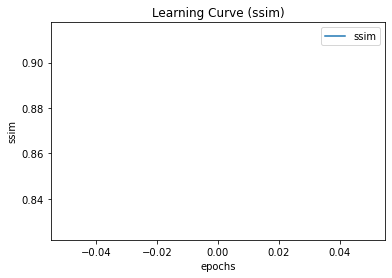

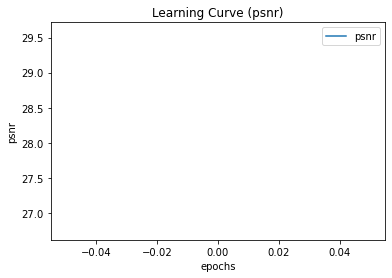

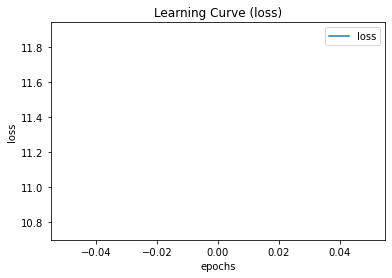

In [3]:
e.plot_lc("ssim")
e.plot_lc("psnr")
e.plot_lc("loss")

In [4]:
e.predict("/home/samuel/Documents/CMPUT511/Project/Data/val/LR/DIV2K_valid_LR_bicubic/X2/0900x2.png", img_name="/home/samuel/Documents/CMPUT511/Project/Checkpoint/checkpoint.jpg")

PSNR: 28.539615662647414
SSIM: 0.8547921180725098
Average Loss: 11.31892031788826
Saving image
